In [1]:
# importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# reading dataset

data = pd.read_csv('titanic_dataset.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# no. of rows columns
data.shape

(891, 12)

In [4]:
# checking info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# checking statistics
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# EDA

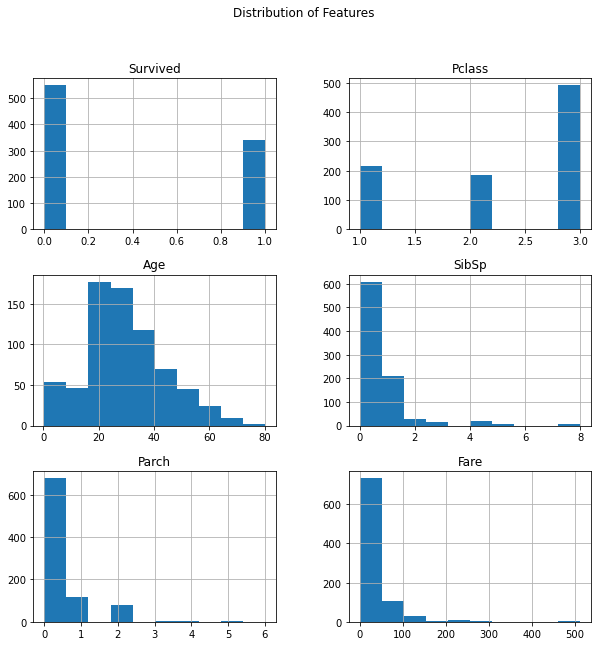

In [6]:
# checking distribution 

numfea = data.drop(['PassengerId'], axis=1).select_dtypes(exclude='object')
numfea.hist(figsize=(10,10))
plt.suptitle('Distribution of Features')
plt.show()

In [7]:
data.skew(numeric_only=True, skipna=True)

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.389108
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64

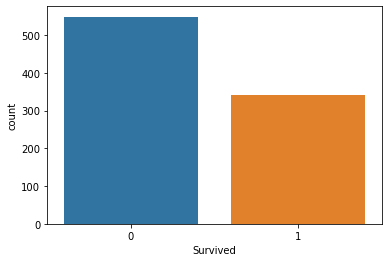

In [8]:
# distributuion of Target column

plt.figure(figsize=(6,4))
sns.countplot(x=data['Survived'])
plt.show()

In [9]:
#value_count of survived

data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [10]:
#percentage of Survived

data['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

The dataset is slightly unbalanced

In [11]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

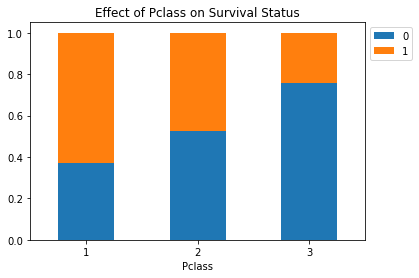

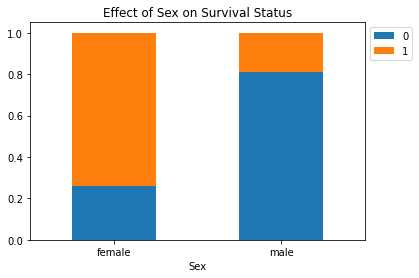

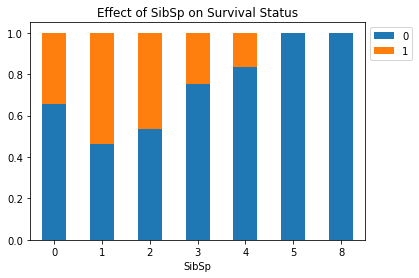

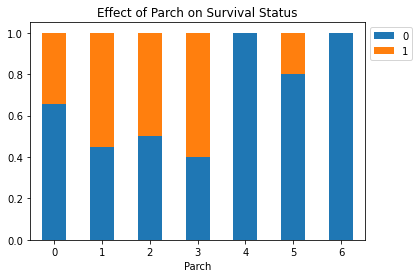

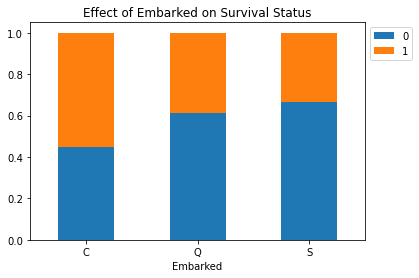

In [12]:
# effect of different features on survival status
fea = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
for column in fea:
    ct = pd.crosstab(data[column], data['Survived'], normalize='index')
    ct.plot(kind='bar', stacked=True, figsize=(6,4))
    plt.title('Effect of {} on Survival Status'.format(column))
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.xticks(rotation=0)
    plt.show()

▪️ Most of the passengers are of 3rd/lower ticket class and only few of them survived while passengers with 1st ticket class survived more.

▪️ Though the passengers where mostly male, survival rate is more for females.

▪️ Most of the passengers travel without siblings. Survival chance decreases when number of siblings increases.

▪️ Most of the passengers travelled alone. Chances of survival increases when they have family with them.

▪️ Most of the passengers where boarded from Southampton, while the survival rate was higher for passengers boarded from Cherbourg

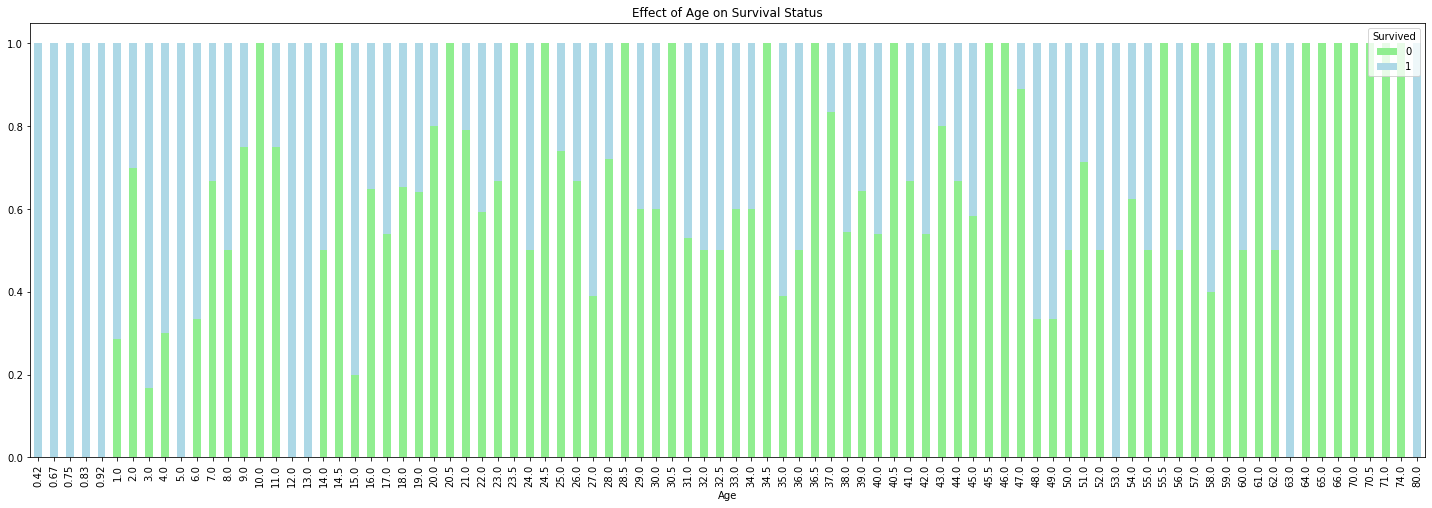

In [13]:
# Effect of Age on survival status
ct = pd.crosstab(data['Age'], data['Survived'], normalize='index')
ct.plot(kind='bar', stacked=True, figsize=(25,8), color=['LightGreen', 'LightBlue'])
plt.title('Effect of Age on Survival Status')
plt.show()

## Preprocessing

In [14]:
# checking for null values

data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
print('Pecentage of null values in Cabin column: ',687/len(data.Cabin)*100)

Pecentage of null values in Cabin column:  77.10437710437711


There are 177 null values in 'Age' column, 687 null values in 'Cabin' column and 2 in 'Embarked' column. We will handle null values in Age and Embarked column and drop Cabin column as 77% of data is missing.

In [16]:
# handling null values
data['Age'] = data['Age'].fillna(data['Age'].median()) #  as age column is right skewed we are handling with median
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0]) #handling nulls in Embarked with most frequent value

In [17]:
# droping cabin column
data.drop(['Cabin'], axis=1, inplace=True)

In [18]:
data.isna().sum().sum()

0

All null values in our dataset have been handled

In [19]:
# droping 'PassengerId' as it have no use
data.drop(['PassengerId'], axis=1, inplace=True)

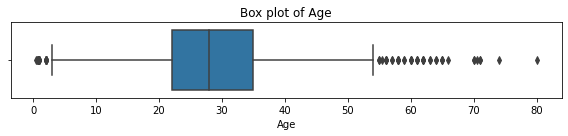

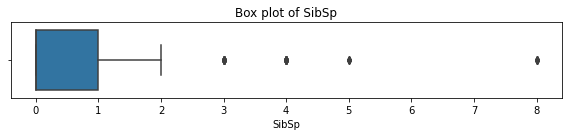

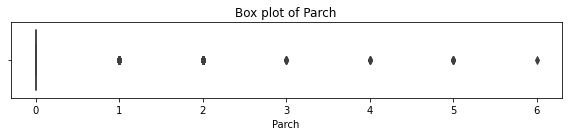

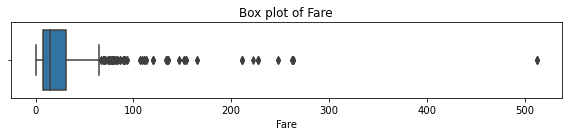

In [20]:
# checking for outliers
numfea = ['Age', 'SibSp', 'Parch', 'Fare']
for column in numfea:
    plt.figure(figsize=(8,2))
    sns.boxplot(x=column, data=data)
    plt.title('Box plot of {}'.format(column))
    plt.tight_layout()
    plt.show()

In [21]:
# outlier detection
# defining IQR
def outlier_limit(dataframe, column, q1=0.25, q3=0.75):
    Q1=dataframe[column].quantile(q1)
    Q3=dataframe[column].quantile(q3)
    IQR = Q3-Q1
    upper_limit=round(Q3+(1.5 * IQR), 4)
    lower_limit=round(Q1-(1.5 * IQR), 4)
    return lower_limit, upper_limit
for column in numfea:
    print(column,':', outlier_limit(data, column))

Age : (2.5, 54.5)
SibSp : (-1.5, 2.5)
Parch : (0.0, 0.0)
Fare : (-26.724, 65.6344)


From the boxplot we can see unusual spread in the boxplot of 'Fare'. 
We will further evaluate outliers in 'Fare' column with by replacing q1 value as 0.10 and q3 value as 0.90.

In [22]:
outlier_limit(data, 'Fare', q1=0.10, q3=0.90)

(-98.0624, 183.5707)

In [23]:
# flooring (at 10th percentile) for the lower values and capping (at 90th percentile) for the higher values in 'fare' column
data['Fare']=np.where(data['Fare']>data['Fare'].quantile(0.90),data['Fare'].quantile(0.90),data['Fare'])
data['Fare']=np.where(data['Fare']<data['Fare'].quantile(0.10),data['Fare'].quantile(0.10),data['Fare'])

The Maximum age value is found to be 80 which is not an impossible situation. So this value may not be considered an outlier for the relevant dataset.
Using this point of view we have to rethink about outlier evaluation.
We will examine whether the variables together form an outlier by using Local Outlier Factor (LOF).

In [24]:
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors=20) #taking n_neighbors=20 appears to work well in general
lof.fit_predict(data[numfea])
lof_scores = lof.negative_outlier_factor_
np.sort(lof_scores)[0:30]

array([-8.50062666e+09, -7.76767182e+09, -5.00000000e+09, -7.92000001e+08,
       -1.22254419e+02, -1.04489519e+02, -6.11275678e+01, -4.52988552e+01,
       -4.30726276e+01, -4.28215621e+01, -4.28015677e+01, -4.02090421e+01,
       -3.93959681e+01, -3.61566519e+01, -6.95454519e+00, -5.01448278e+00,
       -4.64011571e+00, -4.60697698e+00, -4.60697698e+00, -4.60697698e+00,
       -4.55227522e+00, -3.77911551e+00, -3.52598787e+00, -3.42621143e+00,
       -3.17677031e+00, -3.17677031e+00, -3.17677031e+00, -3.17677031e+00,
       -3.17677031e+00, -3.17677031e+00])

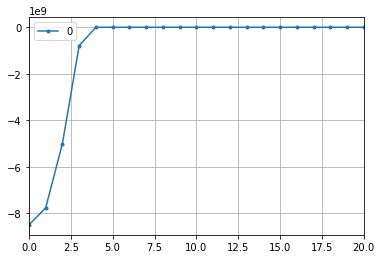

In [25]:
lof_scores1 = pd.DataFrame(np.sort(lof_scores))
lof_scores1.plot(stacked=True, xlim=[0,20], style='.-')
plt.grid()
plt.show()

In [26]:
th = np.sort(lof_scores)[4] #We choose the threshold value according to lof scores 
data[lof_scores < th]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
57,0,3,"Novel, Mr. Mansouer",male,28.5,0,0,2697,7.5500,C
477,0,3,"Braund, Mr. Lewis Richard",male,29.0,1,0,3460,7.5500,S
502,0,3,"O'Sullivan, Miss. Bridget Mary",female,28.0,0,0,330909,7.6292,Q
804,1,3,"Hedman, Mr. Oskar Arvid",male,27.0,0,0,347089,7.5500,S


In [27]:
# We delete those that are higher than the threshold
data.drop(data[lof_scores<th].index, inplace=True)
data.shape

(887, 10)

## Feature Enginering

In [28]:
# Creating a new column Family Size as combination of SibSp and Parch
data['Fam_siz'] = data['SibSp']+data['Parch']+1

In [29]:
# creating bins
data['Age'].describe()

count    887.000000
mean      29.367159
std       13.048693
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [30]:
data['Age_bin'] = pd.cut(data['Age'], bins=[0,3,18,56,80], labels=['infants','child', 'adult','senior_citizen'])

In [31]:
data['Fare'].describe()

count    887.000000
mean      25.730534
std       23.404417
min        7.550000
25%        7.925000
50%       14.458300
75%       31.137500
max       77.958300
Name: Fare, dtype: float64

In [32]:
data['Fare_bin'] = pd.cut(data['Fare'], bins=[0,8,14.5,31,78], labels=['low','lower_middle','upper_middle','high'])

In [33]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked', 'Fam_siz', 'Age_bin', 'Fare_bin'],
      dtype='object')

In [34]:
#droping columns
data.drop(['Name','Age','SibSp','Parch','Ticket','Fare'], axis=1, inplace=True)

In [35]:
data.nunique()

Survived    2
Pclass      3
Sex         2
Embarked    3
Fam_siz     9
Age_bin     4
Fare_bin    4
dtype: int64

In [36]:
data.dtypes

Survived       int64
Pclass         int64
Sex           object
Embarked      object
Fam_siz        int64
Age_bin     category
Fare_bin    category
dtype: object

## Encoding

In [37]:
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()
for column in ['Sex','Embarked','Age_bin','Fare_bin']:
    data[[column]]=data[[column]].apply(le.fit_transform)
    le_map = dict(zip(le.classes_, le.transform(le.classes_)))
    print(le_map)

{'female': 0, 'male': 1}
{'C': 0, 'Q': 1, 'S': 2}
{'adult': 0, 'child': 1, 'infants': 2, 'senior_citizen': 3}
{'high': 0, 'low': 1, 'lower_middle': 2, 'upper_middle': 3}


#### Checking correlation

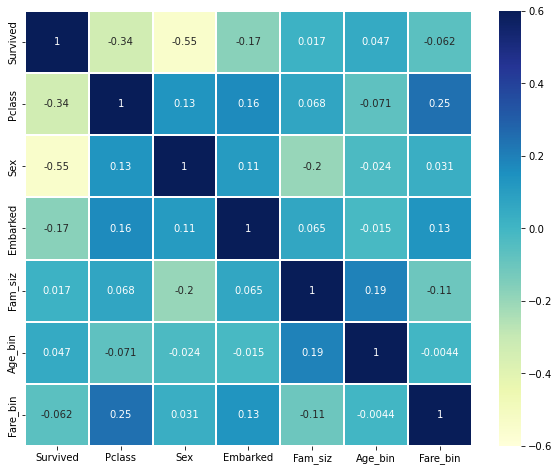

In [38]:
plt.subplots(figsize=(10,8))
sns.heatmap(data=data.corr(), vmin=-0.6, vmax=0.6, annot=True, linewidth=0.2, cmap='YlGnBu')
plt.show()

Most of the features are NOT highly correlated to each other.

In [39]:
data.head()

,Survived,Pclass,Sex,Embarked,Fam_siz,Age_bin,Fare_bin
0,0,3,1,2,2,0,1
1,1,1,0,0,2,0,0
2,1,3,0,2,1,0,1
3,1,1,0,2,2,0,0
4,0,3,1,2,1,0,2


## Dataset Preparation

In [40]:
# splitting data
y = data['Survived']
X = data.drop(['Survived'], axis=1)

print('shape of X: ',X.shape)
print('shape of y: ',y.shape)

shape of X:  (887, 6)
shape of y:  (887,)


In [41]:
X.describe()

,Pclass,Sex,Embarked,Fam_siz,Age_bin,Fare_bin
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000
mean,2.305524,0.647125,1.537768,1.907554,0.308906,1.471251
std,0.836662,0.478134,0.791094,1.616234,0.720045,1.108665
min,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,2.000000,0.000000,1.000000,1.000000,0.000000,0.500000
50%,3.000000,1.000000,2.000000,1.000000,0.000000,1.000000
75%,3.000000,1.000000,2.000000,2.000000,0.000000,2.000000
max,3.000000,1.000000,2.000000,11.000000,3.000000,3.000000


As there's no much variation in the data, we proceed without scaling

In [42]:
## Splitting data into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y, random_state=42, test_size=0.25)

print('Shape of X_train: ',X_train.shape)
print('Shape of X_test: ',X_test.shape)
print('Shape of y_train: ',y_train.shape)
print('Shape of y_test: ',y_test.shape)

Shape of X_train:  (665, 6)
Shape of X_test:  (222, 6)
Shape of y_train:  (665,)
Shape of y_test:  (222,)


## Model Bilding - Gaussian NaiveBayes Classifier

In [43]:
#importing necessary libraries
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix

In [44]:
clf = GaussianNB()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Classification Model: {}'.format(clf.__class__.__name__))
print('Confusion Matrix: \n',confusion_matrix(y_test, y_pred))
print('Classification Report: \n',classification_report(y_test, y_pred))

Classification Model: GaussianNB
Confusion Matrix: 
 [[108  26]
 [ 24  64]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.81      0.81       134
           1       0.71      0.73      0.72        88

    accuracy                           0.77       222
   macro avg       0.76      0.77      0.77       222
weighted avg       0.78      0.77      0.78       222



We have an accuracy of 77%.

50 datapoints have been misclassified

## Hyperparameter Tuning

In [45]:
# default parameters of GaussianNB

GNB = GaussianNB()
GNB.get_params(deep=True)

{'priors': None, 'var_smoothing': 1e-09}

In [46]:
# we use RepeatedStratifiedKFold()
#to assess the model since it repeats stratified folds n-times with a different random scheme in each iteration.

from sklearn.model_selection import RepeatedStratifiedKFold
cv_method = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=999)

Gaussian Naive Bayes assumes that features follows normal distribution which is most unlikely in real world.So solve this problem we can perform "power transformation" on each feature to make it more or less normally distributed. By default, PowerTransformer results in features that have a 0 mean and 1 standard deviation.

In [47]:
# Apply a power transform to make data more Gaussian-like.
# finding best params using GridSearchCV

NB_params = {'var_smoothing':np.logspace(0, -9, num=100)}

from sklearn.model_selection import GridSearchCV
gs_GNB = GridSearchCV(estimator=GNB,
                      param_grid=NB_params,
                      cv=cv_method,
                      scoring='f1',
                      n_jobs=4,
                      verbose=3,
                      return_train_score=True)

X_train_trans = preprocessing.PowerTransformer().fit_transform(X_train)

gs_GNB.fit(X_train_trans, y_train)

print('Best parameters: ',gs_GNB.best_params_)
print('Score: ',gs_GNB.best_score_)

Fitting 15 folds for each of 100 candidates, totalling 1500 fits
Best parameters:  {'var_smoothing': 0.3511191734215131}
Score:  0.7245259612631343


In [48]:
X_test_trans = preprocessing.PowerTransformer().fit_transform(X_test)
y_hyp_pred = gs_GNB.predict(X_test_trans)

print('Classification Model: {}'.format(gs_GNB.__class__.__name__))
print('Confusion Matrix: \n',confusion_matrix(y_test, y_hyp_pred))
print('Classification Report: \n',classification_report(y_test, y_hyp_pred))

Classification Model: GridSearchCV
Confusion Matrix: 
 [[112  22]
 [ 30  58]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.84      0.81       134
           1       0.72      0.66      0.69        88

    accuracy                           0.77       222
   macro avg       0.76      0.75      0.75       222
weighted avg       0.76      0.77      0.76       222

